In [2]:
import os

# PAD VAN DE PARENT FOLDER. BEETJE HACKY, MAAR DEZE MOET JE VERANDEREN NAAR JE EIGEN PATH TOT DEZE FOLDER.
# GEBRUIK EEN r"" STRING

PARENT_FOLDER_PATH_MATS_WINDOWS = r"C:\Users\MatsE\Documents\Industrial Design\Digital Twins\django-do-app\digitaltwin\hedge"
PARENT_FOLDER_PATH_MATS_MAC = r"/Users/matserdkamp/Documents/django-do-app/digitaltwin/hedge"
PARENT_FOLDER_PATH_TIMO = r"" #VUL IN EN VERVANG VARIABELE HIERONDER

# Change the working directory to the parent directory of the current file
os.chdir(PARENT_FOLDER_PATH_MATS_MAC)

# Optionally, print the new current working directory to verify the change
print("New current working directory:", os.getcwd())

New current working directory: /Users/matserdkamp/Documents/django-do-app/digitaltwin/hedge


In [3]:
from src.prepare_data import prep

# DEZE GOOIT EEN ERROR MAAR MOET JE GEWOON EEN KEER RUNNEN VOLGENS MIJ

prep()

torch.cuda.is_available() False
(1) import profiles
start import loads


FileNotFoundError: [Errno 2] No such file or directory: 'data/data_preparation_inputs/TC1a/TrialMonitoringDataHH.csv'

### B. Using the HEDGE tool (example in `test_hedge.py`)
1. Inputs personal parameters in `config_parameters/hedge_config.yaml`
2. Import home energy data generator object
`from src.hedge import HEDGE`
3. Create home energy data generator object instance, with at least the number of homes as an input
`data_generator = HEDGE(n_homes)`.

#### other optional inputs are:
- factors0; the initial scaling factors in the format factors0[data_type][home]
  - where data_type is in ['car', 'PV', 'loads']
  - where home is an integer in [0, n_homes[
- clusters0; the initial behaviour clusters in the format factors0[data_type][home]
  - where data_type is in ['car', 'loads']
  - where home is an integer in [0, n_homes[
- data_types; the types of data the user would like to produce, it has to list one, two of three of the strings ['car', 'PV', 'loads']; if left blank all three types will be generated
4. For each new day to be generated, call hedge.
`day = data_generator.make_next_day()`

#### where day contains the following entries:
- `day['avail_car']` (`n_homes` x `n`) integers 0 for unavailable, 1 for available]
  where n was defined in run_config.yaml as the number of time intervals per day
- `day['loads_car']` (`n_homes` x `n`) car consumption in kWh for each time interval of the day
- `day['gen']` (`n_homes` x `n`) PV generation in kWh for each time interval of the day
- `day['loads']` (`n_homes` x `n`) household consumption in kWh for each time interval of the day

an optional parameter to this method is `plotting`, which will save plots of the data that has been generated for each home."""

In [4]:
from hedge import HEDGE

n_homes = 10

data_generator = HEDGE(n_homes)


data = data_generator.make_next_day()



# Convert each array to a list and ensure it's flat (1D) if necessary
for key in data.keys():
    data[key] = data[key].tolist()

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.1.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
import pandas as pd

# Now create the DataFrame
df = pd.DataFrame(data)

# Show the DataFrame to verify
print(df.gen)

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0047725927934...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0494426958131...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0698302721230...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0016125059150...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0074736553694...
5    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0028728918139...
6    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0129882705508...
7    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015340181449...
8    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030916795232...
9    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0026000909413...
Name: gen, dtype: object


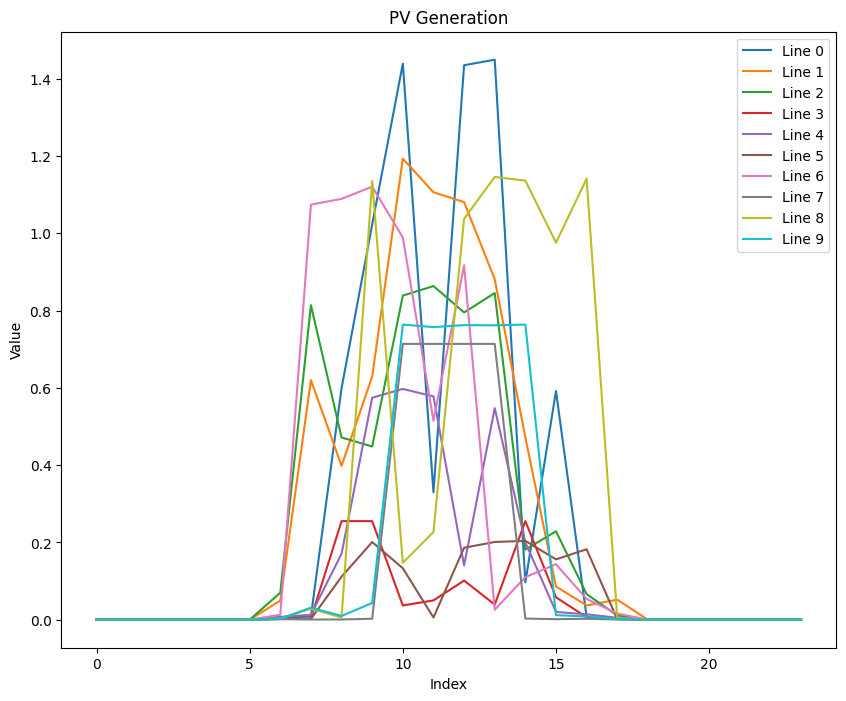

In [6]:
import matplotlib.pyplot as plt

# Let's assume df is your existing DataFrame and 'gen' is the column of interest.
# First, ensure that each item in 'gen' is an actual list or a numpy array.
# If necessary, you can use ast.literal_eval to safely evaluate strings that look like lists.

# Here's how you would plot each line:
plt.figure(figsize=(10, 8))

for index, row in df.iterrows():
    plt.plot(row['gen'], label=f'Line {index}')

plt.title('PV Generation')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()  # This will add a legend using the labels we've just created.
plt.show()

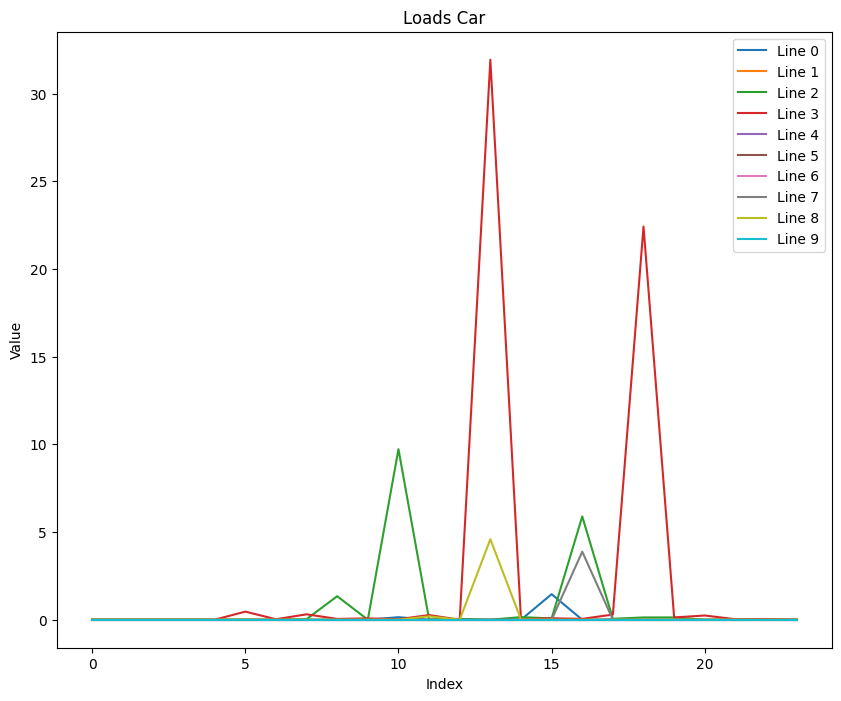

In [7]:
import matplotlib.pyplot as plt

# Let's assume df is your existing DataFrame and 'gen' is the column of interest.
# First, ensure that each item in 'gen' is an actual list or a numpy array.
# If necessary, you can use ast.literal_eval to safely evaluate strings that look like lists.

# Here's how you would plot each line:
plt.figure(figsize=(10, 8))

for index, row in df.iterrows():
    plt.plot(row['loads_car'], label=f'Line {index}')

plt.title('Loads Car')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()  # This will add a legend using the labels we've just created.
plt.show()

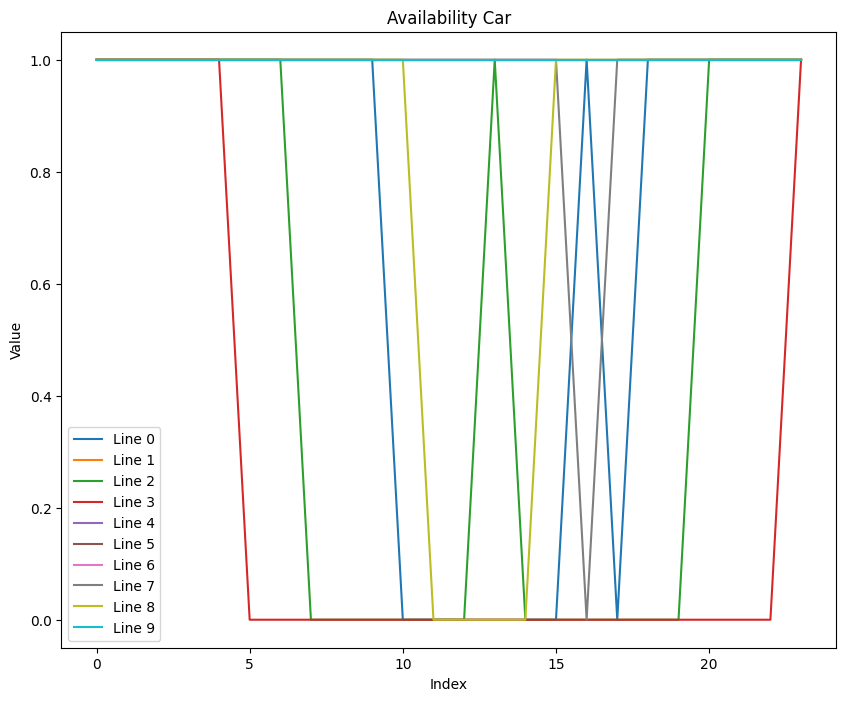

In [8]:
import matplotlib.pyplot as plt

# Let's assume df is your existing DataFrame and 'gen' is the column of interest.
# First, ensure that each item in 'gen' is an actual list or a numpy array.
# If necessary, you can use ast.literal_eval to safely evaluate strings that look like lists.

# Here's how you would plot each line:
plt.figure(figsize=(10, 8))

for index, row in df.iterrows():
    plt.plot(row['avail_car'], label=f'Line {index}')

plt.title('Availability Car')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()  # This will add a legend using the labels we've just created.
plt.show()

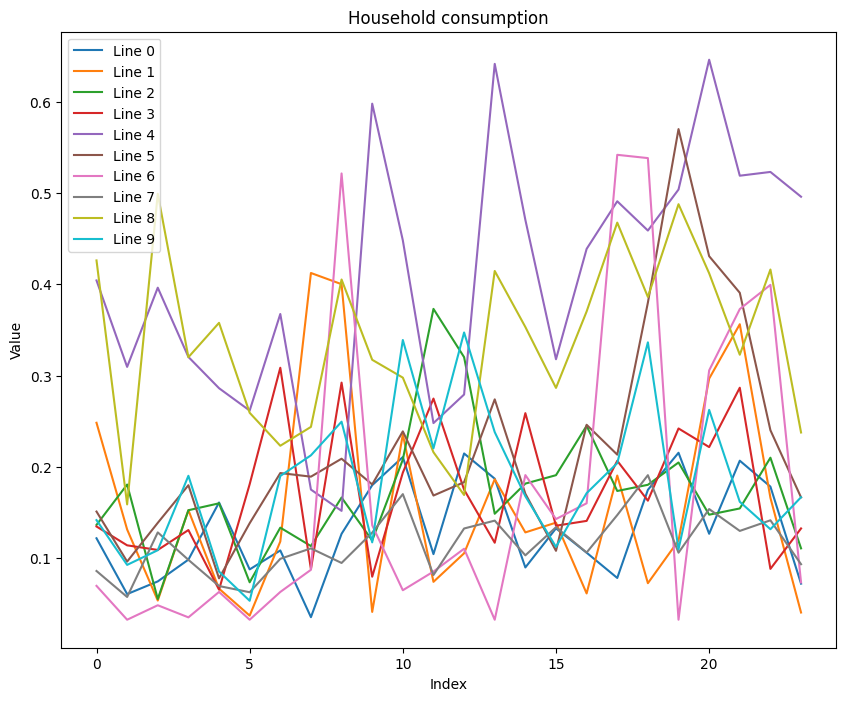

In [9]:
import matplotlib.pyplot as plt

# Let's assume df is your existing DataFrame and 'gen' is the column of interest.
# First, ensure that each item in 'gen' is an actual list or a numpy array.
# If necessary, you can use ast.literal_eval to safely evaluate strings that look like lists.

# Here's how you would plot each line:
plt.figure(figsize=(10, 8))

for index, row in df.iterrows():
    plt.plot(row['loads'], label=f'Line {index}')

plt.title('Household consumption')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()  # This will add a legend using the labels we've just created.
plt.show()